In [1]:
!pip install numpy
!pip install pandas
!pip install scipy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install yfinance
!pip install pyarrow
!pip install fastapi uvicorn
!pip install nest_asyncio
!pip install PyPortfolioOpt


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import nest_asyncio  # Standard library import
nest_asyncio.apply()
# FastAPI for building APIs
from fastapi import FastAPI, Request  # Third-party libraries related to FastAPI

# Data manipulation and analysis libraries
import pandas as pd  # DataFrame handling
import numpy as np  # Numerical operations

# Data visualization libraries
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Statistical data visualization

In [3]:
# Portfolio optimization libraries
from pypfopt import EfficientFrontier, risk_models, expected_returns, discrete_allocation  # Portfolio optimization tools

In [4]:
try:
    df = pd.read_parquet("C:\\Users\\bahar\\Downloads\\stock_sample_data.parquet", engine='pyarrow')
    print(df.head())
except Exception as e:
    print(f"Error reading the Parquet file: {e}")

         date       open       high        low      close     volume  \
0  2000-01-03  56.330471  56.464592  48.193848  43.463036    4674353   
1  2000-01-03   0.936384   1.004464   0.907924   0.844004  535796800   
2  2000-01-03  15.823756  16.160433  15.599306   8.327244   10635087   
3  2000-01-03   1.409722   1.416667   1.263889   1.277778     433800   
4  2000-01-03  16.812500  16.875000  16.062500  16.274672    7384400   

  context_id  day  
0          A    0  
1       AAPL    0  
2        ABT    0  
3       ACGL    0  
4       ADBE    0  


In [5]:
df.head()

,date,open,high,low,close,volume,context_id,day
0,2000-01-03,56.330471,56.464592,48.193848,43.463036,4674353,A,0
1,2000-01-03,0.936384,1.004464,0.907924,0.844004,535796800,AAPL,0
2,2000-01-03,15.823756,16.160433,15.599306,8.327244,10635087,ABT,0
3,2000-01-03,1.409722,1.416667,1.263889,1.277778,433800,ACGL,0
4,2000-01-03,16.812500,16.875000,16.062500,16.274672,7384400,ADBE,0


In [6]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'context_id', 'day'], dtype='object')

In [7]:
df.dtypes

date           object
open          float64
high          float64
low           float64
close         float64
volume          int64
context_id     object
day             int32
dtype: object

In [8]:
df.tail()

,date,open,high,low,close,volume,context_id,day
2770135,2024-10-15,137.630005,138.469894,137.210007,137.785004,347338,XYL,1
2770136,2024-10-15,134.210007,134.669998,132.723999,133.779999,513843,YUM,1
2770137,2024-10-15,103.510002,105.970001,103.785004,105.294998,436167,ZBH,1
2770138,2024-10-15,376.739990,380.034393,374.040009,374.859985,143956,ZBRA,1
2770139,2024-10-15,192.279999,195.809998,192.184998,193.877594,505126,ZTS,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2770140 entries, 0 to 2770139
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   date        object 
 1   open        float64
 2   high        float64
 3   low         float64
 4   close       float64
 5   volume      int64  
 6   context_id  object 
 7   day         int32  
dtypes: float64(4), int32(1), int64(1), object(2)
memory usage: 158.5+ MB


In [10]:
df.describe()

,open,high,low,close,volume,day
count,2.770140e+06,2.770140e+06,2.770140e+06,2.770140e+06,2.770140e+06,2.770140e+06
mean,7.896540e+01,7.987578e+01,7.803579e+01,6.975346e+01,8.063554e+06,2.023398e+00
std,1.772316e+02,1.793211e+02,1.752055e+02,1.743742e+02,4.729731e+07,1.399191e+00
min,3.020800e-02,3.052100e-02,2.697900e-02,3.052100e-02,0.000000e+00,0.000000e+00
25%,2.331474e+01,2.363000e+01,2.298500e+01,1.647646e+01,9.325000e+05,1.000000e+00
50%,4.384000e+01,4.434167e+01,4.330993e+01,3.344446e+01,2.138809e+06,2.000000e+00
75%,8.250000e+01,8.336308e+01,8.161000e+01,7.118000e+01,5.065600e+06,3.000000e+00
max,9.839980e+03,9.912560e+03,9.791000e+03,9.892300e+03,9.230856e+09,4.000000e+00


In [11]:
count_null = df.isnull().sum()
count_null

date          0
open          0
high          0
low           0
close         0
volume        0
context_id    0
day           0
dtype: int64

In [12]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date          datetime64[ns]
open                 float64
high                 float64
low                  float64
close                float64
volume                 int64
context_id            object
day                    int32
dtype: object

In [13]:
# Get the maximum date from the 'date' column
max_date = df['date'].max()

# Calculate the start date as January 1st of the year 5 years before the maximum year
start_year = max_date.year - 5
start_date = pd.Timestamp(f"{start_year}-01-01")

# Filter the DataFrame for the last 5 years from the maximum date
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= max_date)]

# Output the filtered DataFrame
print(filtered_df.head())

              date       open       high        low      close     volume  \
2047334 2019-01-02  66.500000  66.570000  65.300003  63.061302    2113300   
2047335 2019-01-02  38.722500  39.712502  38.557499  37.750084  148158800   
2047336 2019-01-02  91.239998  91.260002  88.419998  68.699379    6908400   
2047337 2019-01-02  70.389999  70.959999  69.070000  62.953064    8737200   
2047338 2019-01-02  26.370001  26.520000  26.040001  26.190001     818400   

        context_id  day  
2047334          A    2  
2047335       AAPL    2  
2047336       ABBV    2  
2047337        ABT    2  
2047338       ACGL    2  


In [14]:
print(len(filtered_df))

722806


In [15]:
tickers_data = filtered_df.pivot(index='date', columns='context_id', values='close')
cnt_null = tickers_data.isnull().sum()
print(cnt_null)
print(len(tickers_data))

context_id
A         0
AAPL      0
ABBV      0
ABNB    490
ABT       0
       ... 
XYL       0
YUM       0
ZBH       0
ZBRA      0
ZTS       0
Length: 503, dtype: int64
1457


In [16]:
# Get the count of null values for each column
null_counts = tickers_data.isnull().sum()

# Filter the columns that have null values
columns_with_nulls = null_counts[null_counts > 0]

# Print the context_ids and their corresponding number of null values
print("Context IDs with null values and their counts:")
for context_id, count in columns_with_nulls.items():
    print(f"{context_id}: {count} null values")


Context IDs with null values and their counts:
ABNB: 490 null values
CARR: 305 null values
CEG: 768 null values
CRWD: 111 null values
CTVA: 99 null values
DOW: 53 null values
FOX: 48 null values
FOXA: 47 null values
GEHC: 997 null values
GEV: 1319 null values
KVUE: 1092 null values
OTIS: 305 null values
PLTR: 440 null values
SOLV: 1319 null values
SW: 1386 null values
UBER: 89 null values
VLTO: 1197 null values


In [17]:
# Identify columns with more than 700 null values
columns_to_drop = null_counts[null_counts > 700].index

# Drop those columns from the DataFrame
cleaned_tickers_data = tickers_data.drop(columns=columns_to_drop)

# Output the cleaned DataFrame and the columns that were dropped
print("Dropped columns with more than 700 null values:", columns_to_drop.tolist())
print("Cleaned tickers data:")
print(cleaned_tickers_data)

Dropped columns with more than 700 null values: ['CEG', 'GEHC', 'GEV', 'KVUE', 'SOLV', 'SW', 'VLTO']
Cleaned tickers data:
context_id           A        AAPL        ABBV        ABNB         ABT  \
date                                                                     
2019-01-02   63.061302   37.750084   68.699379         NaN   62.953064   
2019-01-03   60.738140   33.989899   66.435852         NaN   59.982037   
2019-01-04   62.840504   35.440903   68.576202         NaN   61.694012   
2019-01-07   64.174873   35.362015   69.577057         NaN   62.617924   
2019-01-08   65.115654   36.036121   69.900436         NaN   61.866112   
...                ...         ...         ...         ...         ...   
2024-10-09  144.800003  229.539993  194.750000  135.490005  115.949997   
2024-10-10  142.740005  229.039993  194.350006  132.809998  115.620003   
2024-10-11  143.820007  227.550003  194.190002  134.399994  116.120003   
2024-10-14  144.250000  231.300003  195.649994  134.789993  117

In [18]:
# Interpolate to fill NaN values based on surrounding values
cleaned_tickers_data_interpolated = cleaned_tickers_data.interpolate()

# Output the DataFrame after interpolation
print("Data after interpolation:")
print(cleaned_tickers_data_interpolated)

Data after interpolation:
context_id           A        AAPL        ABBV        ABNB         ABT  \
date                                                                     
2019-01-02   63.061302   37.750084   68.699379         NaN   62.953064   
2019-01-03   60.738140   33.989899   66.435852         NaN   59.982037   
2019-01-04   62.840504   35.440903   68.576202         NaN   61.694012   
2019-01-07   64.174873   35.362015   69.577057         NaN   62.617924   
2019-01-08   65.115654   36.036121   69.900436         NaN   61.866112   
...                ...         ...         ...         ...         ...   
2024-10-09  144.800003  229.539993  194.750000  135.490005  115.949997   
2024-10-10  142.740005  229.039993  194.350006  132.809998  115.620003   
2024-10-11  143.820007  227.550003  194.190002  134.399994  116.120003   
2024-10-14  144.250000  231.300003  195.649994  134.789993  117.250000   
2024-10-15  145.050003  233.910004  192.399994  133.050003  116.739998   

context_id 

In [19]:
# Count the number of null values for each column after interpolation
cnt_na = cleaned_tickers_data_interpolated.isnull().sum()

# Identify columns with any missing values
columns_with_na = cnt_na[cnt_na > 0].index

# Drop the columns with missing values from the DataFrame
cleaned_tickers_data_final = cleaned_tickers_data_interpolated.drop(columns=columns_with_na)

# Output the number of columns before and after dropping
print("Number of columns before dropping:", cleaned_tickers_data_interpolated.shape[1])
print("Number of columns after dropping:", cleaned_tickers_data_final.shape[1])
print("Dropped columns:", columns_with_na.tolist())

Number of columns before dropping: 496
Number of columns after dropping: 486
Dropped columns: ['ABNB', 'CARR', 'CRWD', 'CTVA', 'DOW', 'FOX', 'FOXA', 'OTIS', 'PLTR', 'UBER']


In [20]:
print(cleaned_tickers_data_final.isnull().sum())

context_id
A       0
AAPL    0
ABBV    0
ABT     0
ACGL    0
       ..
XYL     0
YUM     0
ZBH     0
ZBRA    0
ZTS     0
Length: 486, dtype: int64


In [21]:
cleaned_tickers_data_final.head()

context_id,A,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,63.061302,37.750084,68.699379,62.953064,26.190001,129.003662,224.570007,77.160194,34.914425,115.298706,...,138.197968,17.055883,98.654648,40.635628,52.611282,62.058720,82.342476,95.017204,156.240005,81.050751
2019-01-03,60.738140,33.989899,66.435852,59.982037,25.780001,124.599213,215.699997,72.499321,34.760948,111.816887,...,135.298843,17.634176,97.700241,40.475506,51.803505,59.931335,80.271301,93.298553,146.880005,78.249275
2019-01-04,62.840504,35.440903,68.576202,61.694012,26.389999,129.444122,226.190002,74.259499,35.562389,116.273262,...,138.955078,18.236248,101.640755,40.871574,53.713490,62.459965,82.360466,96.484993,152.970001,81.319382
2019-01-07,64.174873,35.362015,69.577057,62.617924,26.330000,129.893707,229.259995,74.726486,35.741455,115.644211,...,139.979965,18.600655,103.445648,40.694614,53.992798,61.536201,82.270432,96.522171,155.289993,81.808685
2019-01-08,65.115654,36.036121,69.900436,61.866112,26.430000,133.178680,232.679993,76.549507,36.406487,116.326408,...,140.875504,18.711563,106.686874,41.166538,54.385368,62.114712,82.108307,94.357590,156.330002,83.027138


In [22]:
daily_returns = cleaned_tickers_data_final.pct_change()

# Resetting the index to have 'date' back as a column (optional)


daily_returns = daily_returns.fillna(0)
daily_returns.reset_index(inplace=True)
# Display the first few rows of daily_returns to verify the calculation
print(daily_returns.head())



# Show the shape of the daily_returns DataFrame to see the number of tickers and dates
print(daily_returns.shape)

context_id       date         A      AAPL      ABBV       ABT      ACGL  \
0          2019-01-02  0.000000  0.000000  0.000000  0.000000  0.000000   
1          2019-01-03 -0.036840 -0.099607 -0.032948 -0.047194 -0.015655   
2          2019-01-04  0.034614  0.042689  0.032217  0.028541  0.023662   
3          2019-01-07  0.021234 -0.002226  0.014595  0.014976 -0.002274   
4          2019-01-08  0.014660  0.019063  0.004648 -0.012006  0.003798   

context_id       ACN      ADBE       ADI       ADM  ...       WTW        WY  \
0           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
1          -0.034142 -0.039498 -0.060405 -0.004396  ... -0.020978  0.033906   
2           0.038884  0.048632  0.024279  0.023056  ...  0.027023  0.034142   
3           0.003473  0.013573  0.006289  0.005035  ...  0.007376  0.019983   
4           0.025290  0.014918  0.024396  0.018607  ...  0.006398  0.005963   

context_id      WYNN       XEL       XOM       XYL       YUM       ZBH  \


In [23]:
if 'date' in daily_returns.columns:
    daily_returns.set_index('date', inplace=True)
# Calculate average return and volatility for each ticker
average_returns = daily_returns.mean()
volatility = daily_returns.std()

# Sharpe ratio (assuming risk-free rate is 0 for simplicity)
sharpe_ratio = average_returns / volatility

# Create a DataFrame with performance metrics
performance_metrics = pd.DataFrame({
    'Average Return': average_returns,
    'Volatility': volatility,
    'Sharpe Ratio': sharpe_ratio
})

# Preview the performance metrics
print(performance_metrics.head())


            Average Return  Volatility  Sharpe Ratio
context_id                                          
A                 0.000738    0.018220      0.040512
AAPL              0.001446    0.019677      0.073492
ABBV              0.000830    0.015543      0.053373
ABT               0.000552    0.015989      0.034504
ACGL              0.001191    0.020072      0.059321


In [24]:
# Define the function for selecting tickers based on two criteria
def select_best_tickers_two_step(performance_metrics, avg_return_top_n=100, sharpe_ratio_top_n=10):
    # Step 1: Select top N tickers based on Average Return
    top_avg_return = performance_metrics.sort_values(by='Average Return', ascending=False).head(avg_return_top_n)

    # Step 2: Select top M tickers based on Sharpe Ratio from the top N selected
    final_selection = top_avg_return.sort_values(by='Sharpe Ratio', ascending=False).head(sharpe_ratio_top_n)

    return final_selection

# Example usage:
selected_tickers = select_best_tickers_two_step(performance_metrics, avg_return_top_n=100, sharpe_ratio_top_n=10)
print("Final selected tickers based on Average Return and Sharpe Ratio:\n", selected_tickers)


Final selected tickers based on Average Return and Sharpe Ratio:
             Average Return  Volatility  Sharpe Ratio
context_id                                          
NVDA              0.003054    0.032991      0.092566
LLY               0.001666    0.019425      0.085765
PWR               0.001854    0.022172      0.083629
COST              0.001183    0.014602      0.081026
FICO              0.001967    0.025186      0.078114
SMCI              0.003218    0.041771      0.077037
TT                0.001422    0.018555      0.076624
BLDR              0.002481    0.032385      0.076596
PGR               0.001251    0.016805      0.074424
AAPL              0.001446    0.019677      0.073492


In [25]:
selected_tickers.shape

(10, 3)

In [26]:
# Extract the index (tickers) from selected_tickers
tickers_to_plot = selected_tickers.index.tolist()
print(tickers_to_plot)

['NVDA', 'LLY', 'PWR', 'COST', 'FICO', 'SMCI', 'TT', 'BLDR', 'PGR', 'AAPL']


In [27]:
# Filter the DataFrame for the selected tickers
filtered_tickers_data = cleaned_tickers_data_final[tickers_to_plot]
print(filtered_tickers_data)

context_id        NVDA         LLY         PWR        COST         FICO  \
date                                                                      
2019-01-02    3.378323  105.469978   29.430424  186.597931   185.490005   
2019-01-03    3.174214  102.192390   29.066479  182.642868   178.770004   
2019-01-04    3.377579  105.267982   30.659969  187.946655   189.479996   
2019-01-07    3.556390  105.837212   30.778000  188.639252   193.449997   
2019-01-08    3.467853  106.810356   31.250149  190.051727   197.169998   
...                ...         ...         ...         ...          ...   
2024-10-09  132.649994  919.739990  307.609985  909.099976  2024.989990   
2024-10-10  134.809998  910.690002  306.989990  893.630005  1984.520020   
2024-10-11  134.800003  932.059998  309.420013  889.030029  2031.000000   
2024-10-14  138.070007  929.510010  310.980011  889.760010  2068.909912   
2024-10-15  131.065506  910.599976  306.605011  894.719971  2065.139893   

context_id       SMCI   

In [28]:
filtered_tickers_data.shape

(1457, 10)

In [29]:
# Resetting index to have 'Date' as a column for easier manipulation
filtered_tickers_data.reset_index(inplace=True)

# Extracting the year from the date
filtered_tickers_data['Year'] = filtered_tickers_data['date'].dt.year
print(filtered_tickers_data.head())

context_id       date      NVDA         LLY        PWR        COST  \
0          2019-01-02  3.378323  105.469978  29.430424  186.597931   
1          2019-01-03  3.174214  102.192390  29.066479  182.642868   
2          2019-01-04  3.377579  105.267982  30.659969  187.946655   
3          2019-01-07  3.556390  105.837212  30.778000  188.639252   
4          2019-01-08  3.467853  106.810356  31.250149  190.051727   

context_id        FICO   SMCI         TT   BLDR        PGR       AAPL  Year  
0           185.490005  1.510  64.830215  11.51  50.702099  37.750084  2019  
1           178.770004  1.570  63.788689  11.48  49.846077  33.989899  2019  
2           189.479996  1.556  65.963867  12.10  50.984585  35.440903  2019  
3           193.449997  1.570  65.276573  12.50  51.395473  35.362015  2019  
4           197.169998  1.560  65.574158  12.59  51.986122  36.036121  2019  


C:\Users\bahar\AppData\Local\Temp\ipykernel_32264\4073077647.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tickers_data['Year'] = filtered_tickers_data['date'].dt.year


In [30]:
annual_data = filtered_tickers_data.groupby('Year').mean().reset_index()
annual_data.drop(columns = 'date', inplace=True)
annual_data.head()

context_id,Year,NVDA,LLY,PWR,COST,FICO,SMCI,TT,BLDR,PGR,AAPL
0,2019,4.338880,108.236110,36.925806,240.288295,300.860476,1.951754,84.061546,17.723849,65.946441,50.229929
1,2020,9.860238,141.155844,45.985892,305.638661,406.222530,2.650399,103.187214,25.862174,78.435929,93.041305
2,2021,19.484777,217.012417,96.883493,402.381778,463.178928,3.693222,170.334697,51.507579,92.450485,138.498220
3,2022,18.545463,301.309686,127.748945,491.349741,461.844264,5.511968,149.132526,64.696215,116.004203,152.943427
4,2023,36.555017,460.658449,178.164882,519.706522,820.809479,20.404100,191.613206,115.484760,139.005881,171.470440


In [31]:
annual_data.shape

(6, 11)

In [32]:
print(annual_data.iloc[:, 1])

0     4.338880
1     9.860238
2    19.484777
3    18.545463
4    36.555017
5    99.316543
Name: NVDA, dtype: float64


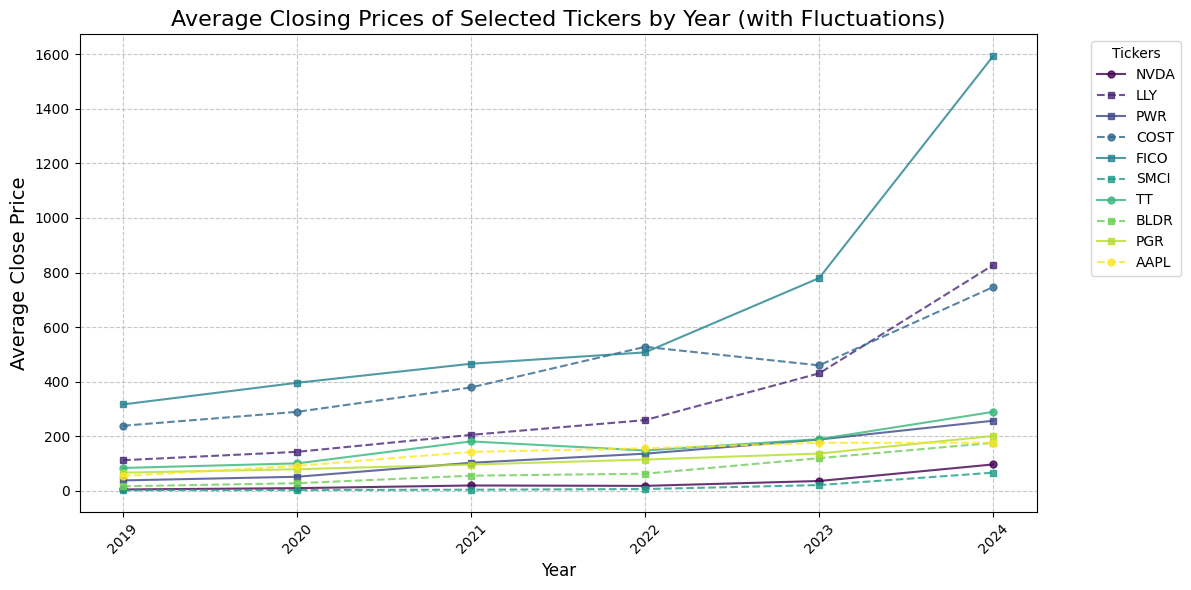

In [51]:
# Introduce fluctuations to the average closing prices
fluctuation_factor = 0.05  # Adjust this factor for more or less fluctuation
annual_data.iloc[:, 1:] += annual_data.iloc[:, 1:].apply(lambda x: x * np.random.uniform(-fluctuation_factor, fluctuation_factor, size=len(x)))

# Select tickers to plot

# Create a color map for better visualization
colors = plt.cm.viridis(np.linspace(0, 1, len(tickers_to_plot)))

# Plotting
plt.figure(figsize=(12, 6))
for i, ticker in enumerate(tickers_to_plot):
    plt.plot(annual_data['Year'], annual_data[ticker], 
             label=ticker, 
             color=colors[i], 
             linestyle='-' if i % 2 == 0 else '--',  # Alternate between solid and dashed lines
             marker='o' if i % 3 == 0 else 's',    # Alternate between circle and square markers
             markersize=5,
             alpha=0.8)  # Add some transparency for better visibility

# Customizing the plot
plt.title('Average Closing Prices of Selected Tickers by Year (with Fluctuations)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Close Price', fontsize=14)
plt.xticks(annual_data['Year'], rotation=45)  # Set x-ticks to be the years
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.legend(title='Tickers', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.tight_layout()  # Adjust layout to fit all elements

# Show the plot
plt.show()

In [34]:
tickers_close_prices = filtered_tickers_data[tickers_to_plot]

# Melt the DataFrame to long format, filtering only the ticker and close price
melted_data = tickers_close_prices.melt(var_name='Ticker', value_name='Close Price')
print(melted_data.head())
print(melted_data.shape)

  Ticker  Close Price
0   NVDA     3.378323
1   NVDA     3.174214
2   NVDA     3.377579
3   NVDA     3.556390
4   NVDA     3.467853
(14570, 2)


In [35]:
print(filtered_tickers_data.head())
print(filtered_tickers_data.shape)
print(filtered_tickers_data.columns)

context_id       date      NVDA         LLY        PWR        COST  \
0          2019-01-02  3.378323  105.469978  29.430424  186.597931   
1          2019-01-03  3.174214  102.192390  29.066479  182.642868   
2          2019-01-04  3.377579  105.267982  30.659969  187.946655   
3          2019-01-07  3.556390  105.837212  30.778000  188.639252   
4          2019-01-08  3.467853  106.810356  31.250149  190.051727   

context_id        FICO   SMCI         TT   BLDR        PGR       AAPL  Year  
0           185.490005  1.510  64.830215  11.51  50.702099  37.750084  2019  
1           178.770004  1.570  63.788689  11.48  49.846077  33.989899  2019  
2           189.479996  1.556  65.963867  12.10  50.984585  35.440903  2019  
3           193.449997  1.570  65.276573  12.50  51.395473  35.362015  2019  
4           197.169998  1.560  65.574158  12.59  51.986122  36.036121  2019  
(1457, 12)
Index(['date', 'NVDA', 'LLY', 'PWR', 'COST', 'FICO', 'SMCI', 'TT', 'BLDR',
       'PGR', 'AAPL', 'Ye

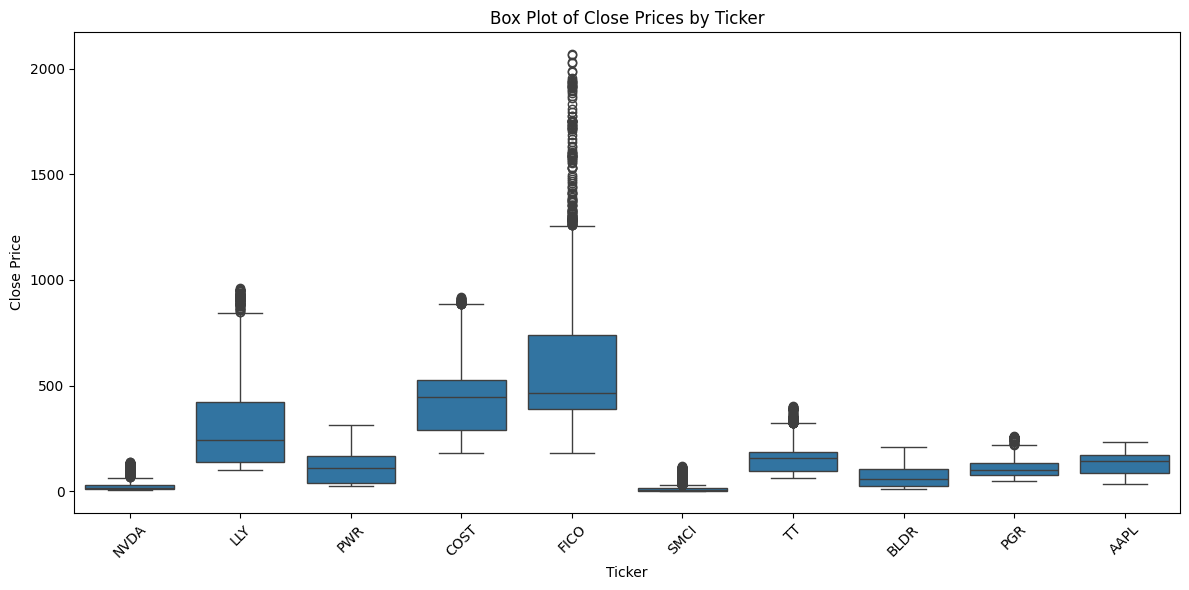

In [36]:
# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Ticker', y='Close Price', data=melted_data)
plt.title('Box Plot of Close Prices by Ticker')
plt.xlabel('Ticker')
plt.ylabel('Close Price')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()
plt.show()

In [37]:
filtered_tickers_data.head()

context_id,date,NVDA,LLY,PWR,COST,FICO,SMCI,TT,BLDR,PGR,AAPL,Year
0,2019-01-02,3.378323,105.469978,29.430424,186.597931,185.490005,1.510,64.830215,11.51,50.702099,37.750084,2019
1,2019-01-03,3.174214,102.192390,29.066479,182.642868,178.770004,1.570,63.788689,11.48,49.846077,33.989899,2019
2,2019-01-04,3.377579,105.267982,30.659969,187.946655,189.479996,1.556,65.963867,12.10,50.984585,35.440903,2019
3,2019-01-07,3.556390,105.837212,30.778000,188.639252,193.449997,1.570,65.276573,12.50,51.395473,35.362015,2019
4,2019-01-08,3.467853,106.810356,31.250149,190.051727,197.169998,1.560,65.574158,12.59,51.986122,36.036121,2019


In [38]:
daily_ticker_data = filtered_tickers_data.set_index('date')
daily_ticker_data.drop('Year', axis=1, inplace=True)
daily_ticker_data.head()

context_id,NVDA,LLY,PWR,COST,FICO,SMCI,TT,BLDR,PGR,AAPL
date,,,,,,,,,,
2019-01-02,3.378323,105.469978,29.430424,186.597931,185.490005,1.510,64.830215,11.51,50.702099,37.750084
2019-01-03,3.174214,102.192390,29.066479,182.642868,178.770004,1.570,63.788689,11.48,49.846077,33.989899
2019-01-04,3.377579,105.267982,30.659969,187.946655,189.479996,1.556,65.963867,12.10,50.984585,35.440903
2019-01-07,3.556390,105.837212,30.778000,188.639252,193.449997,1.570,65.276573,12.50,51.395473,35.362015
2019-01-08,3.467853,106.810356,31.250149,190.051727,197.169998,1.560,65.574158,12.59,51.986122,36.036121


In [39]:
daily_ticker_data.shape

(1457, 10)

In [40]:
daily_returns = daily_ticker_data.pct_change().dropna()
daily_returns.head()

context_id,NVDA,LLY,PWR,COST,FICO,SMCI,TT,BLDR,PGR,AAPL
date,,,,,,,,,,
2019-01-03,-0.060417,-0.031076,-0.012366,-0.021196,-0.036228,0.039735,-0.016065,-0.002606,-0.016883,-0.099607
2019-01-04,0.064068,0.030096,0.054822,0.029039,0.059909,-0.008917,0.034100,0.054007,0.022840,0.042689
2019-01-07,0.052941,0.005407,0.003850,0.003685,0.020952,0.008997,-0.010419,0.033058,0.008059,-0.002226
2019-01-08,-0.024895,0.009195,0.015340,0.007488,0.019230,-0.006369,0.004559,0.007200,0.011492,0.019063
2019-01-09,0.019667,0.007478,0.001259,0.006473,0.009383,-0.004487,0.019989,0.027006,0.009386,0.016982


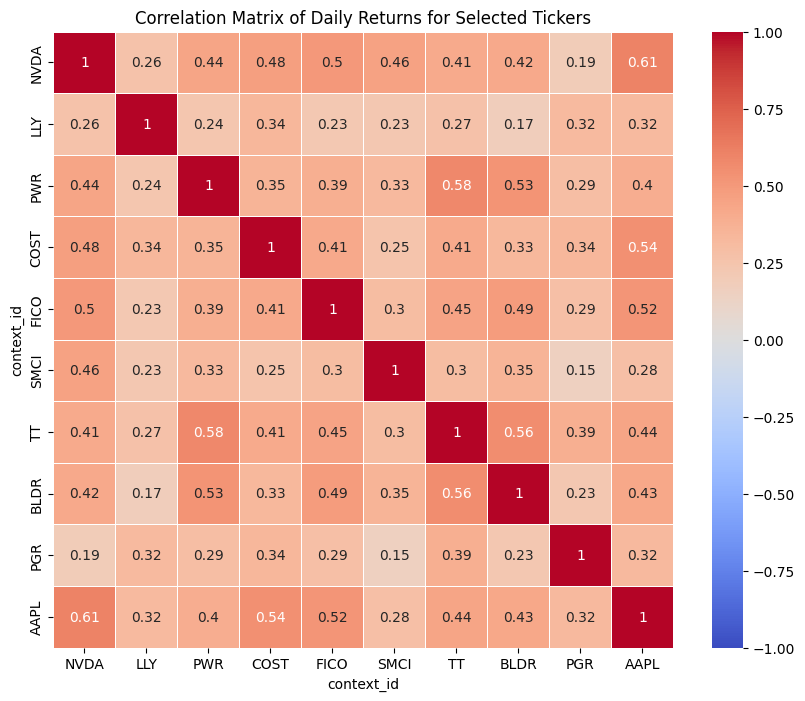

In [41]:
# Step 2: Calculate the correlation matrix for the filtered tickers
correlation_matrix = daily_returns.corr()

# Step 3: Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

plt.title('Correlation Matrix of Daily Returns for Selected Tickers')
plt.show()

In [42]:
def optimize_portfolio(daily_ticker_data, initial_budget):
    # Step 1: Calculate expected returns and covariance matrix
    exp_returns = expected_returns.mean_historical_return(daily_ticker_data)
    cov_matrix = risk_models.CovarianceShrinkage(daily_ticker_data).ledoit_wolf()
    
    # Step 2: Generate random portfolios for plotting
    num_portfolios = 10000
    results = np.zeros((3, num_portfolios))  # Rows for returns, volatility, and Sharpe ratio
    weights_record = []
    
    for i in range(num_portfolios):
        weights = np.random.random(len(exp_returns))
        weights /= np.sum(weights)  # Normalize to sum to 1
        weights_record.append(weights)
    
        portfolio_return = np.sum(exp_returns * weights)  # Expected return
        portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))  # Portfolio volatility
        sharpe_ratio = portfolio_return / portfolio_std_dev  # Sharpe ratio
    
        # Save to results array
        results[0, i] = portfolio_return
        results[1, i] = portfolio_std_dev
        results[2, i] = sharpe_ratio
    
    # Step 3: Convert results to a DataFrame for easier plotting
    results_df = pd.DataFrame(results.T, columns=['Return', 'Volatility', 'Sharpe Ratio'])
    
    # Step 4: Create a new instance of EfficientFrontier for the max Sharpe ratio optimization
    ef = EfficientFrontier(exp_returns, cov_matrix, solver='SCS')
    ef.add_constraint(lambda w: w.sum() == 1)  # Sum of weights is 1
    ef.add_constraint(lambda w: w >= 0)  # No short selling
    
    # Step 5: Maximize Sharpe Ratio and get optimal weights
    weights = ef.max_sharpe()
    cleaned_weights = ef.clean_weights()
    
    # Step 6: Convert continuous weights to discrete allocation based on the given budget
    latest_prices = daily_ticker_data.iloc[-1]  # Latest closing prices of the assets
    initial_budget = 1000  # Total budget available for allocation
    
    # Perform discrete allocation
    da = discrete_allocation.DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=initial_budget)
    allocation, leftover = da.lp_portfolio()
    
    # Step 7: Calculate expected portfolio performance
    expected_return, volatility, sharpe_ratio = ef.portfolio_performance()
    
    # Step 8: Plotting the Efficient Frontier
    plt.figure(figsize=(10, 6))
    plt.scatter(results_df['Volatility'], results_df['Return'], c=results_df['Sharpe Ratio'], cmap='viridis', marker='o', edgecolors='black', s=10)
    plt.colorbar(label='Sharpe Ratio')
    plt.scatter(volatility, expected_return, color='red', marker='*', s=500, label='Max Sharpe Ratio Portfolio')
    plt.xlabel('Volatility')
    plt.ylabel('Return')
    plt.title('Efficient Frontier')
    plt.grid()
    plt.legend()
    plt.show()
    # Save the plot to a file
    plot_path = "efficient_frontier_plot.png"
    plt.savefig(plot_path)
    plt.close()
    # Step 9: Display results
    print("\nDiscrete Allocation:", allocation)
    print("Funds Remaining:", leftover)
    print("Expected Return:", expected_return)
    print("Volatility:", volatility)
    print("Sharpe Ratio:", sharpe_ratio)
    
    #Step 10: Display the total cost of investment and ensure it does not exceed the budget
    total_investment = sum([allocation[ticker] * latest_prices[ticker] for ticker in allocation])
    print("Total Investment Cost:", total_investment)
    print(f"Remaining Budget: {initial_budget - total_investment}")
    results_dict = {
        "Discrete Allocation": allocation,
        "Funds Remaining": leftover,
        "Expected Return": expected_return,
        "Volatility": volatility,
        "Sharpe Ratio": sharpe_ratio,
        "Total Investment Cost": total_investment,
        "Remaining Budget": initial_budget - total_investment,
        "plot_path": plot_path
    }

    return results_dict

In [44]:
from scipy.optimize import minimize

initial_budget = 1000

# Calculate daily returns
daily_returns = daily_ticker_data.pct_change().dropna()

# Calculate covariance matrix of returns
cov_matrix = daily_returns.cov()

# Number of assets
n_assets = len(daily_ticker_data.columns)

# Initial guess for weights (equal allocation)
initial_weights = np.ones(n_assets) / n_assets

# Get last close prices for scaling investment
close_prices = daily_ticker_data.iloc[-1].values

# Risk-aversion parameter (set it between 0 and 1 to balance risk and return)
risk_aversion = 0.5

# Expected returns (mean of daily returns)
expected_returns = daily_returns.mean().values

# Function to calculate portfolio's expected return
def portfolio_return(weights, expected_returns):
    return np.dot(weights, expected_returns)

# Function to calculate portfolio variance (risk)
def portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

# Constraints: sum of weights must be 1 (fully invested)
constraints = [{'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}]

# Bounds: weights between 0 and 1 (long-only portfolio)
bounds = tuple((0, 1) for _ in range(n_assets))

# Objective function: risk-adjusted return (maximizing return and minimizing risk)
def objective_function(weights, expected_returns, cov_matrix, risk_aversion):
    port_return = portfolio_return(weights, expected_returns)
    port_variance = portfolio_variance(weights, cov_matrix)
    return -(risk_aversion * port_return - (1 - risk_aversion) * port_variance)

# Run optimization
optimized = minimize(objective_function, initial_weights, args=(expected_returns, cov_matrix, risk_aversion),
                     method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights
optimal_weights = optimized.x

# Normalize weights to use the full budget
investment_amounts = optimal_weights * close_prices
scaled_weights = investment_amounts * initial_budget / np.sum(investment_amounts)

# Calculate expected portfolio return and risk (variance) based on scaled weights
expected_portfolio_return = portfolio_return(scaled_weights / close_prices, expected_returns) * initial_budget  # Scale return by initial budget
portfolio_risk = portfolio_variance(scaled_weights / close_prices, cov_matrix) ** 0.5  # Calculate portfolio standard deviation (risk)

# Results
print(f"Optimal Weights: {scaled_weights / close_prices}")
print(f"Expected Portfolio Return: ${expected_portfolio_return:.2f}")
print(f"Portfolio Risk (Standard Deviation): {portfolio_risk:.4f}")
print(f"Total Investment: ${np.sum(scaled_weights):.2f}")


Optimal Weights: [0.18373064 0.18373064 0.18373064 0.18373064 0.18373064 0.18373064
 0.18373064 0.18373064 0.18373064 0.18373064]
Expected Portfolio Return: $3.59
Portfolio Risk (Standard Deviation): 0.0297
Total Investment: $1000.00


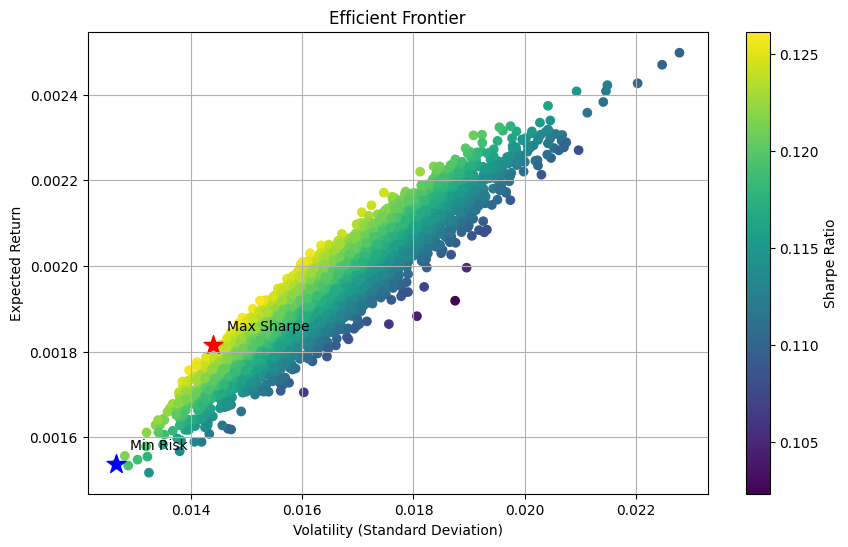

In [45]:
# Calculate daily returns and covariance matrix
daily_returns = daily_ticker_data.pct_change().dropna()
cov_matrix = daily_returns.cov()

# Expected returns (mean of daily returns)
expected_returns = daily_returns.mean().values

# Number of assets
n_assets = len(daily_ticker_data.columns)

# Function to calculate portfolio's expected return
def portfolio_return(weights, expected_returns):
    return np.dot(weights, expected_returns)

# Function to calculate portfolio variance (risk)
def portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

# Generate portfolios
def generate_portfolios(n_portfolios, cov_matrix, expected_returns):
    np.random.seed(42)
    portfolio_weights = []
    portfolio_returns = []
    portfolio_risks = []

    for _ in range(n_portfolios):
        weights = np.random.random(n_assets)
        weights /= np.sum(weights)

        portfolio_weights.append(weights)
        port_return = portfolio_return(weights, expected_returns)
        port_risk = portfolio_variance(weights, cov_matrix) ** 0.5

        portfolio_returns.append(port_return)
        portfolio_risks.append(port_risk)

    return np.array(portfolio_weights), np.array(portfolio_returns), np.array(portfolio_risks)

# Generate portfolios
n_portfolios = 5000
weights, returns, risks = generate_portfolios(n_portfolios, cov_matrix, expected_returns)

# Plot Efficient Frontier
fig, ax = plt.subplots(figsize=(10, 6))
sc = ax.scatter(risks, returns, c=returns / risks, marker='o')

# Highlight the portfolio with the highest Sharpe ratio
max_sharpe_idx = (returns / risks).argmax()
ax.scatter(risks[max_sharpe_idx], returns[max_sharpe_idx], c='red', marker='*', s=200)
ax.annotate('Max Sharpe', (risks[max_sharpe_idx], returns[max_sharpe_idx]), xytext=(10, 10), textcoords='offset points')

# Highlight the portfolio with the minimum risk
min_risk_idx = risks.argmin()
ax.scatter(risks[min_risk_idx], returns[min_risk_idx], c='blue', marker='*', s=200)
ax.annotate('Min Risk', (risks[min_risk_idx], returns[min_risk_idx]), xytext=(10, 10), textcoords='offset points')

plt.colorbar(sc, label='Sharpe Ratio')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.grid(True)
plt.show()


In [46]:
def select_tickers_and_optimize_portfolio(daily_ticker_data, initial_budget):
    selected_tickers = []
    total_investment = 0
    total_risk = 0

    # Calculate daily returns and their metrics
    daily_returns = daily_ticker_data.pct_change().dropna()
    expected_returns = daily_returns.mean().values
    cov_matrix = daily_returns.cov()
    close_prices = daily_ticker_data.iloc[-1].values

    # Sort tickers by expected return (descending order)
    sorted_indices = np.argsort(expected_returns)[::-1]
    sorted_expected_returns = expected_returns[sorted_indices]
    sorted_close_prices = close_prices[sorted_indices]
    sorted_volatility = daily_returns.std().values[sorted_indices]

    # Iterate over the sorted ticker prices
    for i in range(len(sorted_indices)):
        price = sorted_close_prices[i]

        if total_investment + price <= initial_budget:
            # Add current ticker if total investment is still within the budget
            selected_tickers.append(sorted_indices[i])  # Add ticker index to selected list
            total_investment += price
            total_risk += sorted_volatility[i]
        elif (total_investment < initial_budget) and (total_investment + sorted_close_prices[i+1:].min() <= initial_budget):
            # Check if we can add more tickers after exceeding the current one
            for j in range(i + 1, len(sorted_indices)):
                price_next = sorted_close_prices[j]

                if total_investment + price_next <= initial_budget:
                    selected_tickers.append(sorted_indices[j])  # Add the next available ticker
                    total_investment += price_next
                    total_risk += sorted_volatility[j]
        else:
            # If we cannot add any more tickers, exit the loop
            break

    # Calculate the total number of selected assets
    n_selected_assets = len(selected_tickers)

    # Initial weights for selected tickers (based on close price proportionally)
    weights = np.zeros(len(daily_ticker_data.columns))
    if total_investment > 0:
        for i in selected_tickers:
            weights[i] = close_prices[i] / total_investment

    # Expected return of the selected portfolio
    expected_portfolio_return = np.dot(weights, expected_returns) * total_investment

    return {
        "selected_tickers": daily_ticker_data.columns[selected_tickers].tolist(),
        "optimal_weights": weights[weights > 0].tolist(),
        "total_investment": total_investment,
        "total_risk": total_risk,
        "overall_expected_return": expected_portfolio_return  # in percentage
    }

# Example usage:
result = select_tickers_and_optimize_portfolio(daily_ticker_data, initial_budget=1000)
print(result)

{'selected_tickers': ['SMCI', 'NVDA', 'BLDR', 'PWR', 'AAPL'], 'optimal_weights': [0.14291758740290647, 0.33433089910026403, 0.051631796594984354, 0.21605753908118888, 0.25506217782065627], 'total_investment': 917.0705184936523, 'total_risk': 0.1490479000466961, 'overall_expected_return': 1.9522453116961298}


INFO:     Started server process [32264]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


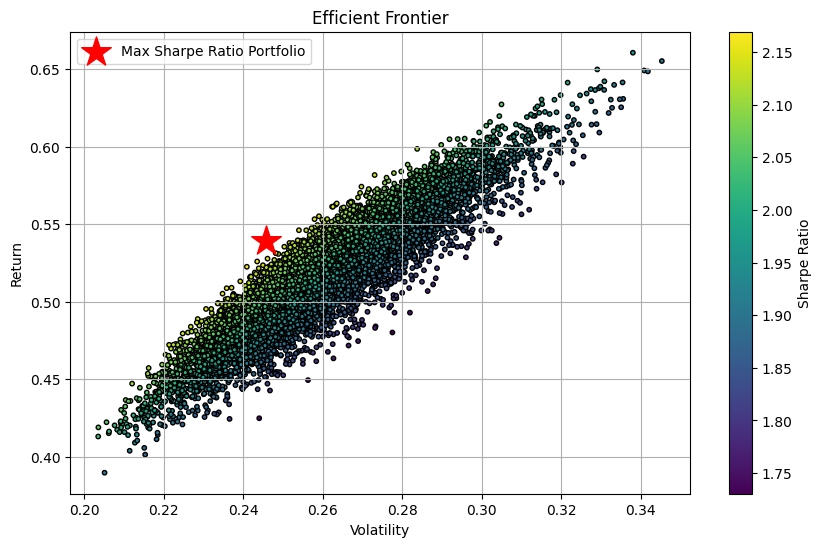


Discrete Allocation: {'NVDA': 2, 'PWR': 1, 'SMCI': 2, 'PGR': 1}
Funds Remaining: 81.47897278566165
Expected Return: 0.5391722052820459
Volatility: 0.2456801732386516
Sharpe Ratio: 2.1132035134871323
Total Investment Cost: 918.5210266113281
Remaining Budget: 81.47897338867188
INFO:     127.0.0.1:50388 - "GET /optimize_portfolio HTTP/1.1" 200 OK
INFO:     127.0.0.1:50388 - "GET /plot HTTP/1.1" 200 OK


In [ ]:
import uvicorn
from fastapi.responses import HTMLResponse, FileResponse
from fastapi import BackgroundTasks
import os
from pypfopt import expected_returns
app = FastAPI()
initial_budget = 1000
# API Endpoint to optimize portfolio and display results
@app.get("/optimize_portfolio")
def optimize_portfolio_endpoint(background_tasks: BackgroundTasks):
    global daily_ticker_data
    if daily_ticker_data.empty:
        return HTMLResponse(content="<h1>Error: Daily ticker data not available</h1>", status_code=400)

    # Call the function to optimize the portfolio
    results = optimize_portfolio(daily_ticker_data, initial_budget)
    # Generate the plot in the background
    background_tasks.add_task(generate_plot)
    # HTML response with portfolio results
    html_content = """
    <html>
        <head><title>Optimized Portfolio Results</title></head>
        <body>
            <h1>Optimized Portfolio Results</h1>
            <ul>
    """

    # Loop through the results and format them into an HTML unordered list
    for key, value in results.items():
        if key != "plot_path":  # We don't want to list the plot path here
            html_content += f"<li><strong>{key.replace('_', ' ').title()}:</strong> {value}</li>"

    html_content += """
            </ul>
            <h2>Efficient Frontier Plot:</h2>
            <img src='/plot' alt='Efficient Frontier Plot' width='600'/>
        </body>
    </html>
    """

    return HTMLResponse(content=html_content)
def generate_plot():
    # Your plotting code goes here
    plot_path = "efficient_frontier_plot.png"
    # Generate and save your plot
    plt.savefig(plot_path)  # Make sure to use the correct plot code here
    plt.close()  # Close the plot to free memory
# Endpoint to serve the plot image
@app.get("/plot")
def get_plot():
    plot_path = "efficient_frontier_plot.png"
    if os.path.exists(plot_path):
        return FileResponse(plot_path)
    else:
        return HTMLResponse(content="<h1>Plot not found</h1>", status_code=404)

if __name__ == "__main__":
    uvicorn.run(app, host="127.0.0.1", port=8000)